In [17]:
# Import depedencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced


# Read the CSV and Perform Basic Data Cleaning

In [19]:
#Load data
file_path = Path('../Final_Project_Resources/final.csv')
df = pd.read_csv (file_path)
df.head()



,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean


In [20]:
# Convert the 'GDP' column into log10
df['GDP_log10'] = np.log10(df['GDP'])

In [21]:
df.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand,11.954322
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean,12.206213
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America,12.148268
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean,11.187343


In [22]:
df.describe()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,country_code,GDP_log10
count,9.200000e+02,9.200000e+02,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000
mean,1.393870e+04,5.331433e+03,3.567609,2010.279348,3.070198,26113.144578,1.342889e+12,438.443478,11.678427
std,2.225534e+05,8.499408e+04,1.517102,4.525734,3.220871,22923.009189,2.847060e+12,258.334203,0.576048
min,2.040000e+00,1.000000e+00,0.800000,2000.000000,-14.758545,970.941956,2.229865e+10,32.000000,10.348279
25%,4.675000e+00,1.000000e+00,2.497500,2007.000000,1.601224,7495.754301,2.108129e+11,188.000000,11.323895
50%,1.395000e+01,5.000000e+00,3.330000,2012.000000,2.850864,14771.257645,3.945133e+11,416.000000,11.596062
75%,8.550000e+01,3.825000e+01,4.290000,2014.000000,4.789940,46498.842667,1.041007e+12,682.000000,12.017448
max,4.000000e+06,1.600500e+06,11.250000,2016.000000,25.162533,92121.421135,1.784427e+13,858.000000,13.251499


In [41]:
# Creating a new Dataframe containing entries from Argentina
df_Argentina = df.loc[df['Country'] == "Argentina"]

In [44]:
df_Argentina

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
22,2001-04-01,ARS,Argentina,2.50,1,2.50,2001,ARG,8.837041,7380.467087,2.811063e+11,32.0,Americas,Latin America and the Caribbean,11.448871
44,2002-04-01,ARS,Argentina,2.50,3,0.83,2002,ARG,9.029573,7962.412309,3.064890e+11,32.0,Americas,Latin America and the Caribbean,11.486415
70,2003-04-01,ARS,Argentina,4.10,2,2.05,2003,ARG,8.851660,8577.864994,3.336183e+11,32.0,Americas,Latin America and the Caribbean,11.523250
94,2004-05-01,ARS,Argentina,4.36,2,2.18,2004,ARG,8.047152,9174.502458,3.604651e+11,32.0,Americas,Latin America and the Caribbean,11.556863
126,2005-06-01,ARS,Argentina,4.75,2,2.38,2005,ARG,9.007651,9901.511881,3.929345e+11,32.0,Americas,Latin America and the Caribbean,11.594320
158,2006-01-01,ARS,Argentina,4.75,3,1.58,2006,ARG,4.057233,10201.475937,4.088768e+11,32.0,Americas,Latin America and the Caribbean,11.611592
182,2006-05-01,ARS,Argentina,7.00,3,2.33,2006,ARG,4.057233,10201.475937,4.088768e+11,32.0,Americas,Latin America and the Caribbean,11.611592
214,2007-01-01,ARS,Argentina,8.25,3,2.75,2007,ARG,-5.918525,9502.243585,3.846773e+11,32.0,Americas,Latin America and the Caribbean,11.585097
246,2007-06-01,ARS,Argentina,8.25,3,2.75,2007,ARG,-5.918525,9502.243585,3.846773e+11,32.0,Americas,Latin America and the Caribbean,11.585097


# Applying Linear Regression Model

In [45]:
X = df_Argentina.GDP_log10.values.reshape(-1,1)
y = df_Argentina.dollar_price.values.reshape(-1,1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [47]:
# training the model
model.fit(X,y)

LinearRegression()

In [48]:
y_pred = model.predict(X)

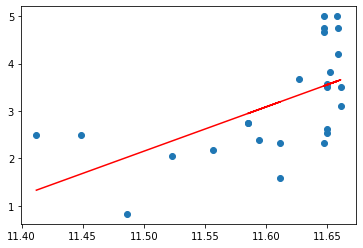

In [49]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

# Scrap sheets

In [23]:
df_values = df.drop(['currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region'], axis=1)

In [26]:
df_values.head()

,date,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2000-04-01,2.50,1,2.50,2000,-10.894485,6854.294081,2.582818e+11,11.412094
1,2000-04-01,2.59,1,2.59,2000,4.001431,45806.687448,9.001655e+11,11.954322
2,2000-04-01,2.95,1,2.95,2000,3.053462,8954.837245,1.607729e+12,12.206213
3,2000-04-01,2.85,1,2.85,2000,3.016889,44863.216018,1.406914e+12,12.148268
4,2000-04-01,1260.00,514,2.45,2000,3.106971,9814.656135,1.539371e+11,11.187343


In [29]:
X = df_values.drop('dollar_price', axis=1)

In [30]:
y = df_values['dollar_price']

In [33]:
print(y.describe())

count    920.000000
mean       3.567609
std        1.517102
min        0.800000
25%        2.497500
50%        3.330000
75%        4.290000
max       11.250000
Name: dollar_price, dtype: float64


In [35]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# Using Linear Regression Model

TypeError: unhashable type: 'numpy.ndarray'

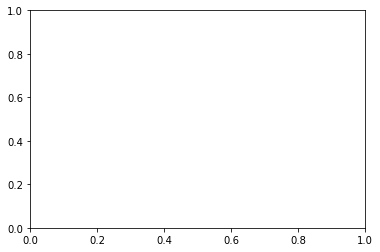

In [36]:
# Ploting the data as a scatter plot using GDP
plt.scatter(X, y)
plt.xlabel('GDP')
plt.ylabel('BigMac Price ($)')
plt.title('GDP vs BigMac Price (Worldwide)')
plt.show()

In [7]:
# # Define independent variable, I am using the log(GDP)
# X =df.GDP_log10.values.reshape(-1,1)

In [8]:
# # Define dependent variable, I am assuming that the column header will be "price"
# y= df.dollar_price.values.reshape(-1,1)

In [9]:
# scaler = StandardScaler()

In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [11]:
# # Instantiate linear regression model
# model = LinearRegression()


In [12]:
# # training the model
# model.fit(X,y)

LinearRegression()

In [13]:
# y_pred = model.predict(X)

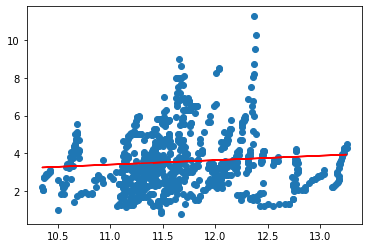

In [14]:
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [15]:
# print(model.coef_)
# print(model.intercept_)

[[0.23434321]]
[0.83084861]


In [16]:
# print(model.score(X,y))

0.007917580398977386


# Using 2nd Polynomial

In [37]:
# Import dependencies
from sklearn.preprocessing import PolynomialFeatures

# Save an instance of Polynomial Feature
poly = PolynomialFeatures(degree=2, include_bias=True)

In [38]:
# poly_features = poly.fit_transform(X.reshape(-1,1))

ValueError: could not convert string to float: '2000-04-01'

In [19]:
# y

array([[ 2.5 ],
       [ 2.59],
       [ 2.95],
       [ 2.85],
       [ 2.45],
       [ 1.24],
       [ 1.39],
       [ 3.09],
       [ 1.22],
       [ 1.83],
       [ 3.62],
       [ 2.77],
       [ 1.51],
       [ 2.32],
       [ 1.7 ],
       [ 1.38],
       [ 3.2 ],
       [ 1.5 ],
       [ 3.  ],
       [ 5.9 ],
       [ 1.45],
       [ 2.24],
       [ 2.5 ],
       [ 3.  ],
       [ 1.8 ],
       [ 3.33],
       [ 2.1 ],
       [ 1.24],
       [ 1.44],
       [ 3.09],
       [ 1.32],
       [ 1.35],
       [ 2.37],
       [ 1.51],
       [ 2.43],
       [ 1.8 ],
       [ 1.18],
       [ 1.48],
       [ 3.3 ],
       [ 1.21],
       [ 2.4 ],
       [ 6.3 ],
       [ 1.22],
       [ 2.24],
       [ 0.83],
       [ 3.  ],
       [ 1.8 ],
       [ 3.33],
       [ 2.14],
       [ 1.31],
       [ 1.66],
       [ 3.09],
       [ 1.69],
       [ 1.7 ],
       [ 3.  ],
       [ 2.02],
       [ 1.68],
       [ 2.43],
       [ 1.8 ],
       [ 4.38],
       [ 2.83],
       [ 1.27],
       [

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [21]:
# poly_reg_model = LinearRegression()

In [22]:
# poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# y_predicted = poly_reg_model.predict(X_test)
# y_predicted

array([[3.50261267],
       [3.52938188],
       [3.79055331],
       [3.55514199],
       [3.5061159 ],
       [3.62886805],
       [3.53735056],
       [3.54254111],
       [3.45550783],
       [3.58616455],
       [3.55888094],
       [3.5342325 ],
       [3.55144922],
       [3.49058634],
       [3.79349513],
       [3.54129846],
       [3.57510093],
       [3.55471885],
       [3.55353034],
       [3.35109032],
       [3.56160494],
       [3.50438836],
       [3.50364064],
       [3.47707193],
       [3.70995995],
       [3.47274007],
       [3.55933635],
       [3.47166194],
       [3.4934014 ],
       [3.4918384 ],
       [3.78300276],
       [3.55650485],
       [3.5333598 ],
       [3.74810287],
       [3.70170805],
       [3.4814343 ],
       [3.78249634],
       [3.57229754],
       [3.49144217],
       [3.55788938],
       [3.58744184],
       [3.69807378],
       [3.6258104 ],
       [3.59023384],
       [3.7891374 ],
       [3.34501564],
       [3.55661758],
       [3.470

In [24]:
# from sklearn.metrics import mean_squared_error

In [25]:
# poly_reg_rmse = np.sqrt(mean_squared_error(y_test,
#                                           y_predicted))
# poly_reg_rmse

1.4744709176813768

In [26]:
# plt.figure(figsize= (10,6))
# plt.title("Polynomial Reg", size=16)
# plt.scatter(X, y)
# plt.plot(X, y_predicted, c='red')
# plt.show()

# Lets try RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
# X =df.GDP_log10.values.reshape(-1,1)
# y= df.dollar_price

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

ValueError: Found input variables with inconsistent numbers of samples: [7360, 920]

In [30]:
# Creating a StandardScalar instance
scaler = StandardScaler()

# Fitting the Standard Scalar with the training data
X_scalar = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scalar.transform(X_train)
X_test_scaled = X_scalar.transform(X_test)

In [31]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=0)

In [32]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [33]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the accuracy score
mse = mean_squared_error(y_test, predictions)

rmse = mse**0.5

print(mse)
print(rmse)

In [35]:
# Calculate feature importance in Random Forest Model
importance = rf_model.feature_importances_
importance

array([1.])